# IMPORTING PACKAGES 

In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:

# THE DATA IS ABOUT HOW MANY PEOPLE ARE ABOVE AND BELOW THE MARK OF EARNING 50K 


df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape   # CHECKING THE DATA SHAPE 

(32560, 15)

In [5]:
df.tail() # CHECKING THE LAST FIVE ROWS 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.info()  #THIS DATA  IS A MIX OF OBJECT AND INT VALUES 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()  
# THERE ARE NO NULL VALUES IN THE DATA THATS GREAT 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [15]:
print(df['Age'].value_counts())  # CHECKING THE VALUE COUNTS AND UNIQUE VALUES 
print(df['Age'].unique())


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


In [16]:
print(df['Workclass'].value_counts())
print(df['Workclass'].unique())
                                    #THERE ARE 1836 '?' VALUES IN COLUMN WORKCLASS SO WILL REPLACE IT WITH MODE THAT IS PRIVATE 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [18]:
df['Workclass']=df['Workclass'].replace('?','Private')

In [17]:
print(df['Fnlwgt'].value_counts())    
print(df['Fnlwgt'].nunique())

203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
21647


In [14]:
df['Occupation'].value_counts()  # REPLACING THE ? VALUES WITH  THE MODE THAT IS PROF-SPECIALITY 

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
df['Occupation']=df['Occupation'].replace('?','Prof-specialty')

In [20]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [29]:
df['Native_country'].value_counts()  # THE ? VALUES WILL BE REPLACED WITH MODE IN FOLLOWING LINES OF CODES 

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [30]:
df['Native_country']=df['Native_country'].replace('?','United-States')

In [31]:
# checking the corelation 
# the corelation is not really great infact it is moderate 

df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

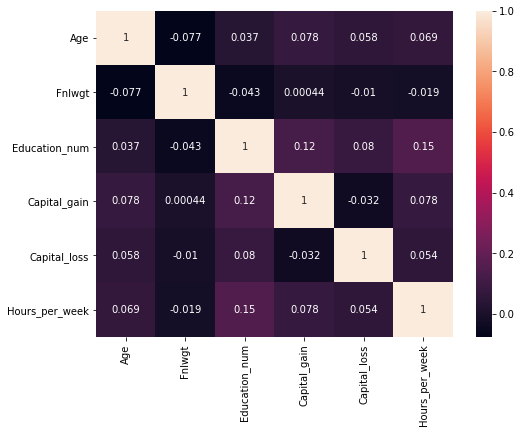

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

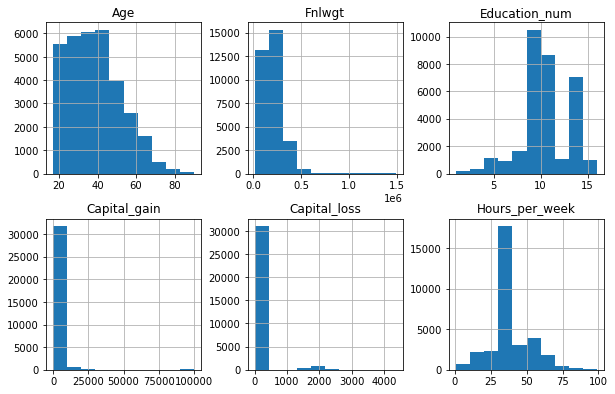

In [36]:
df.hist(figsize=(10,10),layout=(3,3))  # MAKING HISTOGRAM OF NUMERIC COLUMNS 

In [38]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='count'>

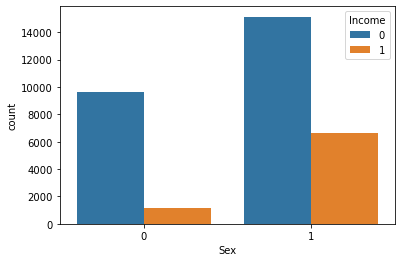

In [67]:
# CHECKING INCOME ON BASIS OF MALE AND FEMALE 
# MOST OF THE MALES ARE EARNING MORE THAN OR EQUAL TO 50K

sns.countplot(x='Sex',hue='Income',data=df)  

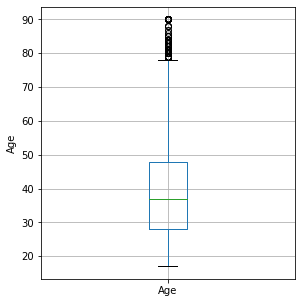

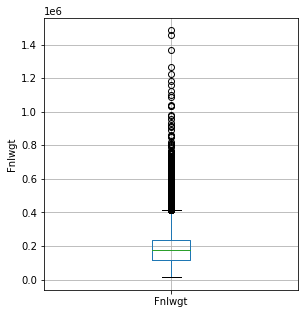

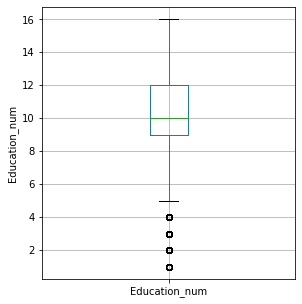

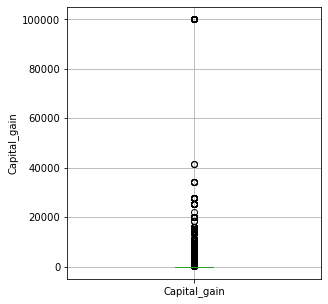

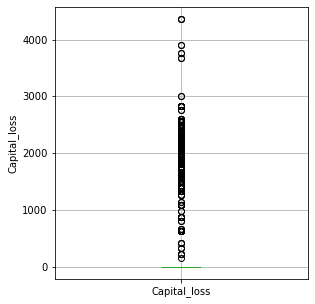

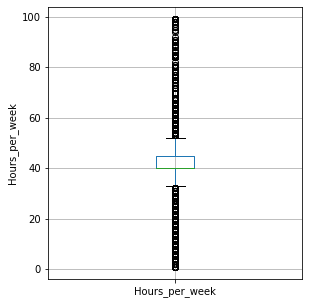

In [39]:
# MAKING BOX PLOT USING FOR LOOP 


boxplot_columns= ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss', 'Hours_per_week']



for i in boxplot_columns:
    
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = df.boxplot(column = i)
    fig.set_ylabel(i)

In [40]:
# THERE ARE EXTREME VALUES IN THIS DATA 
#HOURS PER WEEK - THERE ARE SOME PEOPLE WORKING BEYOND REGULAR HOURS AND ALSO SOME PEOPLE ARE NOT PUTTING ENOUGH EFFORT OR WORKING LESS HOURS 
#AGE ALSO HAS EXTREME VALUES ,OUTLIERS 

In [41]:
# encode the string values into numeric using label encoder 


from sklearn.preprocessing import StandardScaler,LabelEncoder

In [42]:
le = LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [43]:
df.shape

(32560, 15)

In [44]:
# WE WILL SCALE THE DATA FOR BETTER PREDICTION 

sc=StandardScaler().fit(df.drop('Income',axis=1))
sc.transform(df.drop('Income',axis=1))

array([[ 0.83749664,  1.46388339, -1.25206002, ..., -0.20417998,
        -2.25444135,  0.29157343],
       [-0.042559  ,  0.09012148,  0.59298455, ..., -0.20417998,
        -0.03112222,  0.29157343],
       [ 1.05751055,  0.09012148,  0.79964277, ..., -0.20417998,
        -0.03112222,  0.29157343],
       ...,
       [ 1.42420039,  0.09012148, -0.43253619, ..., -0.20417998,
        -0.03112222,  0.29157343],
       [-1.21596651,  0.09012148,  0.39376603, ..., -0.20417998,
        -1.67802528,  0.29157343],
       [ 0.98417258,  0.77700244,  1.21114062, ..., -0.20417998,
        -0.03112222,  0.29157343]])

In [46]:
# DIVIDING THE DATA INTO X AND Y 

x=df.drop('Income',axis=1)
y=df['Income']

In [48]:
x.shape

(32560, 14)

In [49]:
y.shape

(32560,)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=4)

In [54]:
lr=LogisticRegression()  # WILL APPLY LOGISTIC REGRESSION AND CROSS VALIDATION 

In [57]:
lr.fit(x_train,y_train)
plr=lr.predict(x_test)
print(accuracy_score(y_test,plr))

0.7997542997542998


In [58]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78608722 0.79791155 0.7960688  0.79207617 0.79299754]
0.7930282555282555
0.0040540540540540595


In [60]:
# decision tree

dtc=DecisionTreeClassifier()

In [61]:
dtc.fit(x_train,y_train)
pdtc=dtc.predict(x_test)
print(accuracy_score(y_test,pdtc))
print(confusion_matrix(y_test,pdtc))

0.8109643734643734
[[4359  610]
 [ 621  922]]


In [62]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8046683  0.80512899 0.80543612 0.81403563 0.80789312]
0.8074324324324325
0.00348556780322142


In [63]:
# random forest 

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
prfc=rfc.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))

0.8573402948402948
[[4617  352]
 [ 577  966]]


In [64]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85365479 0.85150491 0.85641892 0.86332924 0.86010442]
0.857002457002457
0.004275996138564414


In [ ]:
# SAVING THE BEST MODEL 

In [65]:
import  pickle as pk
file=open('CENSES_PREDICTION','wb')
pk.dump(prfc,file)

In [ ]:
# SELECTING THE BEST MODEL THAT IS RANDOM FOREST WITH 85% ACCURACY 

# * CONCLUSION

In [ ]:
THE MAJOURITY OF PEOPLE ARE FROM AGE GROUP 20 TO 40 IN THIS DATA 
MOSTLY PEOPLE ARE WORKING AROUND 35 TO 40 HOURS A WEEK 
THERE ARE EXTREME VALUES IN THIS DATA 
HOURS PER WEEK - THERE ARE SOME PEOPLE WORKING BEYOND REGULAR HOURS AND ALSO SOME PEOPLE ARE NOT PUTTING ENOUGH EFFORT OR WORKING LESS HOURS 
AGE ALSO HAS EXTREME VALUES ,OUTLIERS
MOST OF THE MALE ARE EARNING MORE THAN OR EQUAL TO 50K 
THE BEST MODEL IS RANDOM FOREST 